In [39]:
import h5py
import numpy as np
import re

#column classification: 0 - normal, 1 - fragmented, 2 - noisy
def classify_column(col, global_mean, global_std, stable_threshold=2):
    col_mean = np.mean(col)

    if abs(col_mean - global_mean) <= 4 * global_std:
        return 0

    chunks = np.array_split(col, 10)
    chunk_means = np.array([np.mean(chunk) for chunk in chunks])

    chunk_std = np.std(chunk_means)
    if chunk_std < 0.2*np.mean(chunk_means) and abs(col_mean - global_mean) >= 6 * global_std:
        return 2
    else:
        return 1  

with h5py.File('Données_CN_V1/GALATEA/GALATEA_C2_REF_N2.h5', 'r') as f:
    image_keys = sorted([k for k in f.keys() if re.match(r'Image \d{4}', k)])
    num_frames = len(image_keys)

    sample_frame = f[image_keys[0]][:]
    num_cols = sample_frame.shape[1]

    my_array = np.zeros((num_frames, num_cols), dtype=np.uint8)

    for frame_idx, key in enumerate(image_keys):
        frame = f[key][:] 
        col_means = np.mean(frame, axis=0)
        global_mean = np.mean(col_means)
        global_std = np.std(col_means)

        for col_idx in range(num_cols):
            col = frame[:, col_idx]
            col_type = classify_column(col, global_mean, global_std)
            my_array[frame_idx, col_idx] = col_type

In [40]:
unique, counts = np.unique(my_array, return_counts=True)
for val, count in zip(unique, counts):
    print(f"Type {val}: {count} ")

Type 0: 63653 
Type 1: 269 
Type 2: 78 


In [41]:
num_frames, num_cols = my_array.shape
final_types = np.zeros(num_cols, dtype=np.uint8)

for col in range(num_cols):
    col_values = my_array[:, col]

    n_type1 = np.sum(col_values == 1) 
    n_type2 = np.sum(col_values == 2) 

    if n_type2 >= 0.8 * num_frames:
        final_types[col] = 3  # noisy
    elif 0.05*num_frames <= n_type2 < 0.8 * num_frames:
        final_types[col] = 2  # blinking
    elif n_type1 >= 2:
        final_types[col] = 1  # blinking-fragmented
    else:
        final_types[col] = 0  # normal



# Final results

In [42]:

unique, counts = np.unique(final_types, return_counts=True)
for val, count in zip(unique, counts):
    print(f"Type {val}: {count} ")

Type 0: 613 
Type 1: 22 
Type 2: 5 


In [43]:
final_types[333]

2

# Visualization

The brightest column: 333


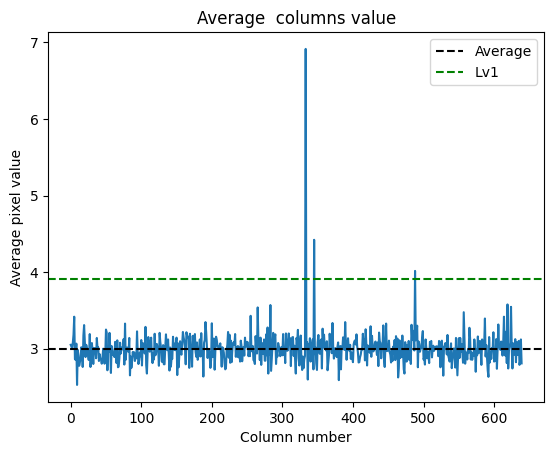

In [34]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

with h5py.File('Données_CN_V1/GALATEA/GALATEA_C2_REF_N2.h5', 'r') as f:
    frame = f['Image 0019'][:]  

column_means = np.mean(frame, axis=0)

bright_col_index = np.argmax(column_means)
print(f"The brightest column: {bright_col_index}")

plt.plot(column_means)
#plt.axvline(bright_col_index, color='red', linestyle='--', label='Abnormal column')
plt.axhline(np.average(column_means), color='black', linestyle='--', label='Average')
plt.axhline(np.average(column_means)+4*np.std(column_means), color='green', linestyle='--', label='Lv1')
#plt.axhline(np.average(column_means)+6*np.std(column_means), color='orange', linestyle='--', label='Lv2')
plt.title('Average  columns value')
plt.xlabel('Column number')
plt.ylabel('Average pixel value')
plt.legend()
plt.show()

In [36]:
import h5py
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import re


with h5py.File('Données_CN_V1/GALATEA/GALATEA_C2_REF_N2.h5', 'r') as f:
    image_keys = sorted(
        [key for key in f.keys() if re.match(r'Image \d{4}', key)]
    )
    
    print(f" {len(image_keys)} frames")

    frames = [f[key][:] for key in image_keys]

def show_frame(i):
    frame = frames[i]
    plt.imshow(frame, cmap='gray' if frame.ndim == 2 else None)
    plt.title(f'Frame {i + 1}')
    plt.axis('off')
    plt.show()

interact(show_frame, i=IntSlider(min=0, max=len(frames)-1, step=1, value=0))

 100 frames


interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

<function __main__.show_frame(i)>